In [169]:
import pandas as pd
import numpy as np

In [170]:
# get data
data = pd.read_csv("../전처리/전처리_최종_V3.csv", encoding="CP949")
data.drop(columns=['Unnamed: 0'], inplace=True)

In [171]:
# 발행회차, 일자, 기준월을 그룹화하여 재정렬
# test2 = data.groupby(['발행회차','발행일자','기준월']).sum()
# test2.to_csv("../전처리/mbs_groupby.csv", encoding="CP949")

In [172]:
# 재정렬 결과 가져오기
# test3 = pd.read_csv("../전처리/mbs_groupby.csv", encoding="CP949")
# test3

In [173]:
# MBS 처리를 위한 시험용 코드
# test_drop = test3.drop_duplicates(['기준우']).reset_index()

In [174]:
# 기준월 기준으로 데이터 그룹화
data_a = data.groupby(['기준월']).mean()

# 금리 차이 구하기
# data_a['금리차'] = data_a['예금은행 대출금리'] - data_a['가중평균발행금리']
# data_a

In [175]:
# 소비자 물가지수 차이 구하기 (a.k.a. 인플레이션 비율)
# 올해 소비자 물가지수 - 지난해 소비자물가지수 / 지난해 소비자 물가지수 * 100
data_a['인플레이션율'] = (data_a['소비자물가지수'].diff() / data_a['소비자물가지수'].shift(1)) * 100
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,조기상환율,CD금리,인플레이션율
기준월,,,,,,,,,,,,,
2004-06,0.510000,5.040000,52.743,51.435,72.119,794.0,785.79,5.99,60.660000,34.530000,0.510000,3.91,NaN
2004-07,0.270000,5.020000,52.603,51.040,72.561,858.0,735.34,5.93,61.090000,29.270000,0.270000,3.91,0.612876
2004-08,0.270000,4.846667,52.394,50.554,73.191,842.0,803.57,5.80,60.920000,31.370000,0.270000,3.70,0.868235
2004-09,0.380000,4.700000,52.283,50.314,73.191,784.0,835.09,5.63,60.830000,32.417500,0.380000,3.52,0.000000
2004-10,0.508000,4.600000,52.157,50.090,73.191,801.0,834.84,5.57,60.896000,33.138000,0.508000,3.52,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.207,100.197,105.300,800.0,2699.18,3.88,60.585462,30.043799,0.929633,1.50,0.582673
2022-03,0.839380,2.477937,100.306,100.337,106.060,798.0,2757.65,3.84,60.576111,30.068175,0.825611,1.50,0.721747
2022-04,0.888984,2.463891,100.517,100.543,106.850,813.0,2695.05,3.90,60.578833,30.048621,0.892509,1.64,0.744861


- 만기전 상환율 : Target -> 건드리지 마
- 가중평균발행금리, 금리차, 조기상환율, LTV, DTI -> 건드리지 마
- 주택종합 매매가격지수, 전세가격지수 : lag 처리
- 실업자, 소비자물가지수 : lag 처리하고 log 처리
- 예금은행대출금리, CD금리, 코스피 : lag 처리 하고 log 차분

In [176]:
data_a['주택종합 매매가격지수'] = data_a['주택종합 매매가격지수'].shift(1)
data_a['주택종합 전세가격지수'] = data_a['주택종합 전세가격지수'].shift(1)
data_a["예금은행 대출금리"] = np.log(data_a["예금은행 대출금리"]).shift(1)
data_a["소비자물가지수"] = np.log(data_a["소비자물가지수"]).shift(1)
data_a["코스피 월별 종가"] = np.log(data_a["코스피 월별 종가"]).shift(1)
data_a["15-64 실업자 수"] = np.log(data_a["15-64 실업자 수"]).shift(1)
data_a["CD금리"] = np.log(data_a["CD금리"]).shift(1)

In [177]:
# 결측치 및 중복컬럼 삭제
data_a.dropna(inplace=True)
data_a.drop(columns=['조기상환율'], inplace=True)

In [178]:
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
기준월,,,,,,,,,,,,
2004-07,0.270000,5.020000,52.743,51.435,4.278318,6.677083,6.666690,1.790091,61.090000,29.270000,1.363537,0.612876
2004-08,0.270000,4.846667,52.603,51.040,4.284428,6.754604,6.600333,1.780024,60.920000,31.370000,1.363537,0.868235
2004-09,0.380000,4.700000,52.394,50.554,4.293072,6.735780,6.689064,1.757858,60.830000,32.417500,1.308333,0.000000
2004-10,0.508000,4.600000,52.283,50.314,4.293072,6.664409,6.727540,1.728109,60.896000,33.138000,1.258461,0.000000
2004-11,0.358333,4.515000,52.157,50.090,4.293072,6.685861,6.727240,1.717395,60.976667,33.403333,1.258461,-0.602533
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.000,100.000,4.651004,6.659294,7.887336,1.348073,60.585462,30.043799,0.329304,0.582673
2022-03,0.839380,2.477937,100.207,100.197,4.656813,6.684612,7.900703,1.355835,60.576111,30.068175,0.405465,0.721747
2022-04,0.888984,2.463891,100.306,100.337,4.664005,6.682109,7.922134,1.345472,60.578833,30.048621,0.405465,0.744861


### 기초통계량 분석

In [179]:
# 데이터프레임의 정보, 결측치 확인
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 2004-07 to 2022-06
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   만기전상환율       214 non-null    float64
 1   가중평균발행금리     214 non-null    float64
 2   주택종합 매매가격지수  214 non-null    float64
 3   주택종합 전세가격지수  214 non-null    float64
 4   소비자물가지수      214 non-null    float64
 5   15-64 실업자 수  214 non-null    float64
 6   코스피 월별 종가    214 non-null    float64
 7   예금은행 대출금리    214 non-null    float64
 8   평균 LTV       214 non-null    float64
 9   평균 DTI       214 non-null    float64
 10  CD금리         214 non-null    float64
 11  인플레이션율       214 non-null    float64
dtypes: float64(12)
memory usage: 21.7+ KB


In [180]:
# 결측치 확인
data_a.isna().sum()

만기전상환율         0
가중평균발행금리       0
주택종합 매매가격지수    0
주택종합 전세가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
CD금리           0
인플레이션율         0
dtype: int64

In [181]:
# 기초 통계 조회
data_a.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2.125790,3.773027,70.835033,72.083953,4.496383,6.771244,7.513644,1.415123,59.874064,32.485376,0.866499,0.190444
std,1.295680,0.954468,11.059051,15.072584,0.106253,0.131812,0.288032,0.314779,1.158292,1.313916,0.542269,0.352039
min,0.037500,2.447768,51.567000,49.086000,4.278318,6.527958,6.600333,0.871293,57.812188,29.270000,-0.462035,-0.744313
25%,1.236738,2.869294,63.628000,56.417250,4.414212,6.677712,7.395603,1.152934,59.055704,31.498212,0.490109,-0.067598
50%,1.748847,3.411875,70.716000,73.672000,4.531157,6.748760,7.583812,1.360977,59.968668,32.773154,0.974560,0.181225
75%,2.753005,4.801858,77.204250,85.564000,4.584640,6.856462,7.652164,1.695616,60.562161,33.592059,1.264127,0.404551
max,9.681872,5.236765,100.768000,100.814000,4.678049,7.078342,8.100671,2.025513,62.019524,34.461733,1.796747,1.188525


In [182]:
# 아주 간단하게 상관관계 분석
data_a.corr()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
만기전상환율,1.000000,-0.212187,0.071402,0.212557,0.265383,0.091006,0.221319,-0.333767,-0.471657,0.328658,-0.120067,-0.208592
가중평균발행금리,-0.212187,1.000000,-0.859188,-0.960978,-0.905004,-0.408910,-0.737516,0.945414,0.087004,0.622796,0.877357,0.122854
주택종합 매매가격지수,0.071402,-0.859188,1.000000,0.950540,0.935405,0.224822,0.863680,-0.750758,-0.152847,-0.665767,-0.807315,0.013417
주택종합 전세가격지수,0.212557,-0.960978,0.950540,1.000000,0.966397,0.332931,0.842150,-0.882945,-0.166292,-0.623201,-0.852136,-0.072632
소비자물가지수,0.265383,-0.905004,0.935405,0.966397,1.000000,0.327146,0.871575,-0.843832,-0.359738,-0.501414,-0.809405,-0.098710
15-64 실업자 수,0.091006,-0.408910,0.224822,0.332931,0.327146,1.000000,0.187947,-0.489313,0.009945,-0.334774,-0.488598,-0.101409
코스피 월별 종가,0.221319,-0.737516,0.863680,0.842150,0.871575,0.187947,1.000000,-0.656381,-0.295453,-0.482773,-0.658527,0.015323
예금은행 대출금리,-0.333767,0.945414,-0.750758,-0.882945,-0.843832,-0.489313,-0.656381,1.000000,0.104470,0.583704,0.902146,0.166505
평균 LTV,-0.471657,0.087004,-0.152847,-0.166292,-0.359738,0.009945,-0.295453,0.104470,1.000000,-0.435826,0.068336,0.061039
평균 DTI,0.328658,0.622796,-0.665767,-0.623201,-0.501414,-0.334774,-0.482773,0.583704,-0.435826,1.000000,0.704716,-0.065775


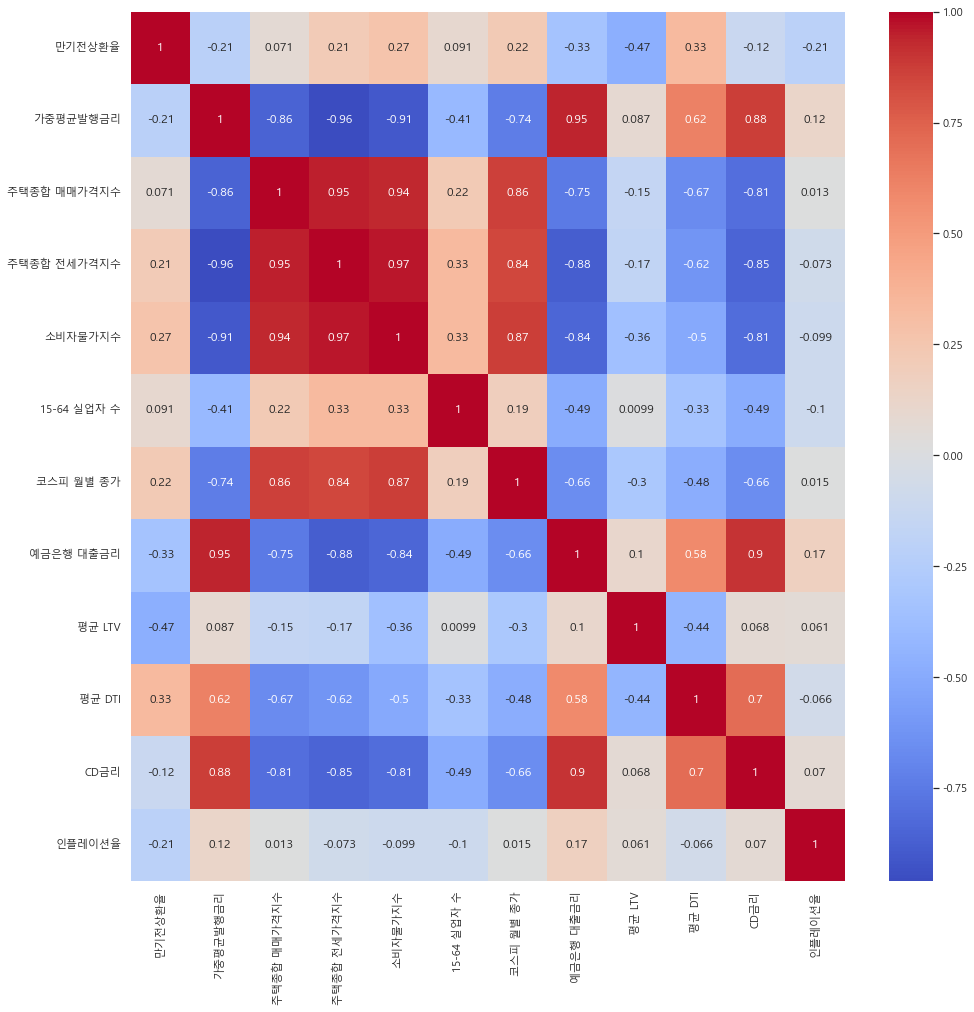

In [183]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_a.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

In [184]:
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_a.values, i) for i in range(data_a.shape[1])]
vif["features"] = data_a.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,30678.293405,소비자물가지수
1,4725.758338,15-64 실업자 수
2,4420.181148,평균 DTI
3,3714.995290,코스피 월별 종가
4,2894.884416,평균 LTV
5,2403.400273,주택종합 전세가격지수
6,1651.790058,주택종합 매매가격지수
7,842.658531,가중평균발행금리
8,632.874988,예금은행 대출금리
9,37.276105,CD금리


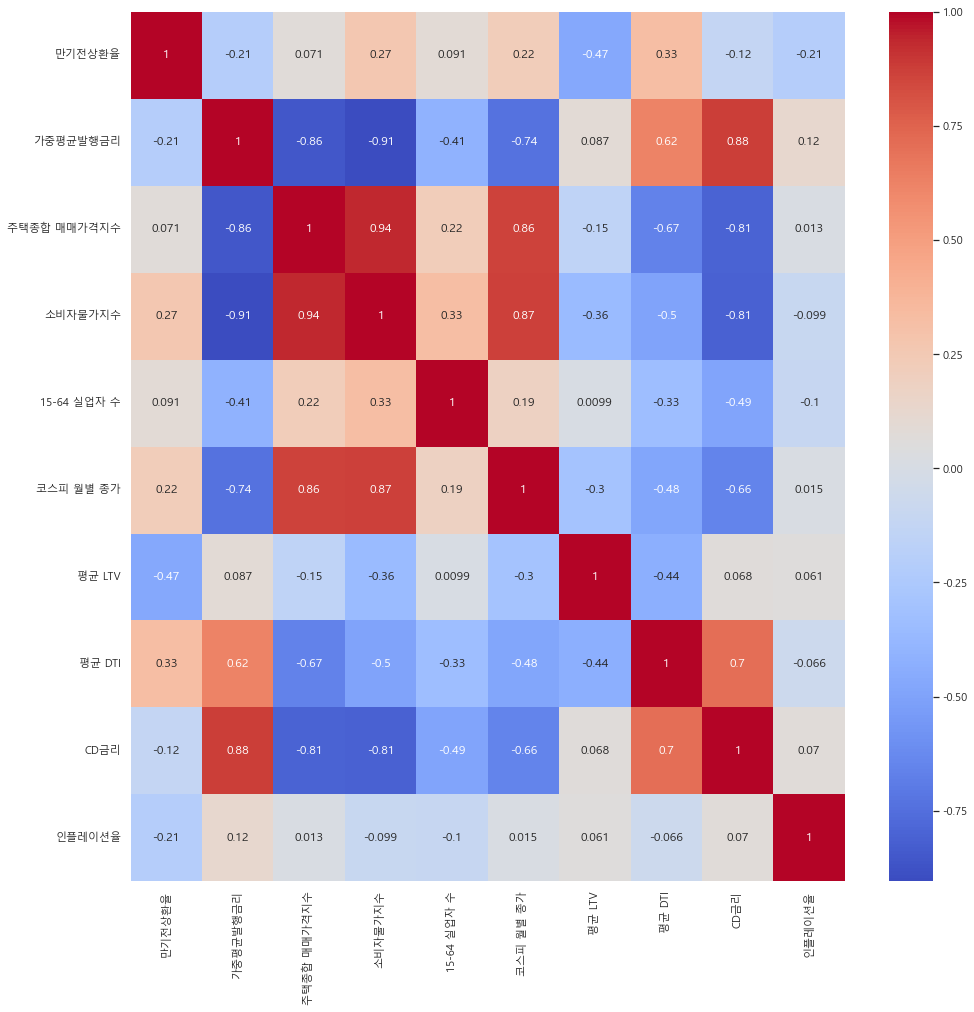

In [186]:
# 히트맵을 보고 컬럼에서 상관관계가 높다고 생각된 컬럼들 선정
data_b = data_a.copy()
data_b.drop(columns=['예금은행 대출금리', '주택종합 전세가격지수'], inplace=True)

# 상관관계 재확인
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_b.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

#### if Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씁니다
- Robuster : 아웃라이어를 없애버림 -> 막판에 만기전상환율이 튀는 걸 살리는 게 맞는 것 같습니다 (못 써요)
- Min-Max : 아웃라이어 살리고 데이터 분포 살리고 (남는 게 이거 뿐이네요)

In [187]:
# lag 등을 고려하지 않고 현재 데이터에서 그냥 회귀분석

data_c = data_b.copy().reset_index()
data_c

,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,평균 LTV,평균 DTI,CD금리,인플레이션율
0,2004-07,0.270000,5.020000,52.743,4.278318,6.677083,6.666690,61.090000,29.270000,1.363537,0.612876
1,2004-08,0.270000,4.846667,52.603,4.284428,6.754604,6.600333,60.920000,31.370000,1.363537,0.868235
2,2004-09,0.380000,4.700000,52.394,4.293072,6.735780,6.689064,60.830000,32.417500,1.308333,0.000000
3,2004-10,0.508000,4.600000,52.283,4.293072,6.664409,6.727540,60.896000,33.138000,1.258461,0.000000
4,2004-11,0.358333,4.515000,52.157,4.293072,6.685861,6.727240,60.976667,33.403333,1.258461,-0.602533
...,...,...,...,...,...,...,...,...,...,...,...
209,2022-02,0.929633,2.478739,100.000,4.651004,6.659294,7.887336,60.585462,30.043799,0.329304,0.582673
210,2022-03,0.839380,2.477937,100.207,4.656813,6.684612,7.900703,60.576111,30.068175,0.405465,0.721747
211,2022-04,0.888984,2.463891,100.306,4.664005,6.682109,7.922134,60.578833,30.048621,0.405465,0.744861
212,2022-05,0.828517,2.447768,100.517,4.671426,6.700731,7.899172,60.550400,30.002507,0.494696,0.664483


In [189]:
# Min - Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mm_temp = data_c.drop(columns=['기준월','만기전상환율'])
colnames = data_c.columns.drop(['기준월','만기전상환율'])

# Training
# scaler.fit(mm_df)

# Traning & Scaling
mm_data = scaler.fit_transform(mm_temp)

mm_result = pd.DataFrame(mm_data, columns=colnames)
mm_result

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,평균 LTV,평균 DTI,CD금리,인플레이션율
0,0.922279,0.023902,0.000000,0.270948,0.044228,0.779071,0.000000,0.808211,0.702174
1,0.860130,0.021056,0.015285,0.411797,0.000000,0.738665,0.404489,0.808211,0.834290
2,0.807542,0.016809,0.036912,0.377595,0.059141,0.717274,0.606252,0.783771,0.385088
3,0.771687,0.014553,0.036912,0.247920,0.084785,0.732961,0.745031,0.761692,0.385088
4,0.741210,0.011992,0.036912,0.286896,0.084586,0.752134,0.796137,0.761692,0.073353
...,...,...,...,...,...,...,...,...,...
209,0.011105,0.984391,0.932341,0.238626,0.857809,0.659152,0.149045,0.350339,0.686548
210,0.010817,0.988598,0.946876,0.284627,0.866718,0.656930,0.153740,0.384057,0.758501
211,0.005781,0.990610,0.964867,0.280079,0.881002,0.657576,0.149973,0.384057,0.770460
212,0.000000,0.994898,0.983432,0.313914,0.865698,0.650819,0.141091,0.423561,0.728874


In [190]:
# Min-Max 스케일링 잘 됐는지 확인
mm_result.describe()

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,평균 LTV,평균 DTI,CD금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.475174,0.391619,0.545529,0.442031,0.608737,0.490067,0.619326,0.588164,0.483619
std,0.342226,0.224773,0.265811,0.239491,0.191978,0.275303,0.253078,0.240071,0.182136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151139,0.245137,0.339965,0.272091,0.530060,0.295559,0.429185,0.421530,0.350115
50%,0.345682,0.389199,0.632525,0.401178,0.655505,0.512553,0.674756,0.636004,0.478849
75%,0.844064,0.521072,0.766320,0.596864,0.701062,0.653614,0.832489,0.764200,0.594392
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
# 최적의 알파값을 찾기 위한 GridSearch 수행
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# ...을 하기 전에 피처랑 타겟 설정
feature_data = mm_result # ALL

# 주요 요인 별로 나눈 이유 -> 위에서 VIF를 보시면 아시겠지만...
feature_data_A = mm_result[['가중평균발행금리', 'CD금리']] # 금리 요인
feature_data_B = mm_result[['주택종합 매매가격지수', '평균 LTV', '평균 DTI']] # 부동산 요인
feature_data_C = mm_result[['15-64 실업자 수', '인플레이션율', '코스피 월별 종가']] # 거시경제 요인
target = data_a['만기전상환율']

In [206]:
# 최적의 알파를 찾아나가봅시다

a = 0.01 # 최초 알파값
alpha_list = [] # 알파 후보 담을 리스트

# 하이퍼 파라미터 값을 찾아야하므로 아무것도 선언하지 않은 모델 생성
model_test = Ridge()

# alpha_list에 0.01부터 1.00 까지 alpha 후보 100개 저장함
for i in range(0,100):
    a = round(a, 2)
    alpha_list.append(a)
    a += 0.01

# grid search 수행
grid_search = GridSearchCV(model_test, param_grid={'alpha' : alpha_list})
grid_search.fit(feature_data_C, target)

print(grid_search.best_params_) # best alpha
MSE = np.abs(grid_search.best_score_)
RMSE = np.sqrt(np.abs(MSE))
print(f'MSE : {MSE} | RMSE: {RMSE}')


# feature_data_A 금리 요인 : Ridge -> 1.0, Lasso -> 0.22, Elastic -> 0.43
# feature_data_B 부동산 요인 : Ridge -> 1.0, Lasso -> 0.08, Elastic -> 0.19
# feature_data_C 거시경제 요인 : Ridge -> 1.0, Lasso -> 0.12, Elastic -> 0.23

{'alpha': 1.0}
MSE : 5.532882064561802 | RMSE: 2.352207912698578


In [207]:
# VIF after Min-Max Scaling
vif_x = pd.DataFrame()
vif_x["VIF Factor"] = [variance_inflation_factor(feature_data.values, i) for i in range(feature_data.shape[1])]
vif_x["features"] = feature_data.columns

vif_x = vif_x.sort_values(by="VIF Factor", ascending=False)
vif_x = vif_x.reset_index().drop(columns='index')
vif_x

,VIF Factor,features
0,170.519520,소비자물가지수
1,93.853477,주택종합 매매가격지수
2,56.828734,코스피 월별 종가
3,48.211349,CD금리
4,31.046168,평균 DTI
5,25.804640,가중평균발행금리
6,8.934450,인플레이션율
7,7.387067,15-64 실업자 수
8,7.168902,평균 LTV


In [208]:
# VIF after Min-Max Scaling
vif_a = pd.DataFrame()
vif_a["VIF Factor"] = [variance_inflation_factor(feature_data_A.values, i) for i in range(feature_data_A.shape[1])]
vif_a["features"] = feature_data_A.columns

vif_a = vif_a.sort_values(by="VIF Factor", ascending=False)
vif_a = vif_a.reset_index().drop(columns='index')
vif_a

,VIF Factor,features
0,9.382942,가중평균발행금리
1,9.382942,CD금리


In [209]:
# VIF after Min-Max Scaling
vif_b = pd.DataFrame()
vif_b["VIF Factor"] = [variance_inflation_factor(feature_data_B.values, i) for i in range(feature_data_B.shape[1])]
vif_b["features"] = feature_data_B.columns

vif_b = vif_b.sort_values(by="VIF Factor", ascending=False)
vif_b = vif_b.reset_index().drop(columns='index')
vif_b

,VIF Factor,features
0,2.659064,평균 LTV
1,2.375083,평균 DTI
2,2.321795,주택종합 매매가격지수


In [210]:
# VIF after Min-Max Scaling
vif_c = pd.DataFrame()
vif_c["VIF Factor"] = [variance_inflation_factor(feature_data_C.values, i) for i in range(feature_data_C.shape[1])]
vif_c["features"] = feature_data_C.columns

vif_c = vif_c.sort_values(by="VIF Factor", ascending=False)
vif_c = vif_c.reset_index().drop(columns='index')
vif_c

,VIF Factor,features
0,7.141412,코스피 월별 종가
1,5.110120,인플레이션율
2,4.081643,15-64 실업자 수


In [211]:
# 요인 별 RMSE 스코어 계산

import test_package as tp
# Hand-made Function
# type = 'lasso', 'ridge', 'elastic'

print('금리 요인')
tp.score_checker('ridge', feature_data_A, target, 1.0)
tp.score_checker('lasso', feature_data_A, target, 0.22)
tp.score_checker('elastic', feature_data_A, target, 0.43)

print('\n부동산 요인\n')
tp.score_checker('ridge', feature_data_B, target, 1.0)
tp.score_checker('lasso', feature_data_B, target, 0.08)
tp.score_checker('elastic', feature_data_B, target, 0.19)

print('\n거시경제 요인')
tp.score_checker('ridge', feature_data_C, target, 1.0)
tp.score_checker('lasso', feature_data_C, target, 0.12)
tp.score_checker('elastic', feature_data_C, target, 0.23)

# 전반적으로 2번째 폴드가 점수는 좋아보임
# 전반적으로 1.3 ~ 1.4 스코어..

금리 요인
Alpha : 1.0
Ridge Negative MSE score : [1.565 0.513 3.249 3.839 4.635]
Ridge RMSE scores : [1.251 0.716 1.803 1.959 2.153]
Ridge AVG RMSE : 1.576

Alpha : 0.22
Lasso Negative MSE score : [1.507 0.584 3.1   4.008 1.019]
Lasso RMSE scores : [1.228 0.764 1.761 2.002 1.009]
Lasso AVG RMSE : 1.353

Alpha : 0.43
Elastic Negative MSE score : [1.507 0.584 3.1   4.008 1.019]
Elastic RMSE scores : [1.228 0.764 1.761 2.002 1.009]
Elastic AVG RMSE : 1.353

부동산 요인

Alpha : 1.0
Ridge Negative MSE score : [0.46  1.398 1.637 3.616 2.518]
Ridge RMSE scores : [0.678 1.182 1.279 1.902 1.587]
Ridge AVG RMSE : 1.326

Alpha : 0.08
Lasso Negative MSE score : [1.618 0.897 2.592 3.839 0.708]
Lasso RMSE scores : [1.272 0.947 1.61  1.959 0.841]
Lasso AVG RMSE : 1.326

Alpha : 0.19
Elastic Negative MSE score : [1.511 0.645 2.959 3.929 0.892]
Elastic RMSE scores : [1.229 0.803 1.72  1.982 0.945]
Elastic AVG RMSE : 1.336

거시경제 요인
Alpha : 1.0
Ridge Negative MSE score : [1.807 0.442 3.145 3.821 2.893]
Ridge RMS

In [ ]:
# 옛날 코드 : 안 써요
# Old CODE : Unused

ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1)

# cross_val_score ==> default = 5-fold
rid_mse_score = cross_val_score(ridge, feature_data, target, scoring="neg_mean_squared_error")
sso_mse_score = cross_val_score(lasso, feature_data, target, scoring="neg_mean_squared_error")
ela_mse_score = cross_val_score(elastic, feature_data, target, scoring="neg_mean_squared_error")

rid_rmse_score = np.sqrt(-1 * rid_mse_score)
sso_rmse_score = np.sqrt(-1 * sso_mse_score)
ela_rmse_score = np.sqrt(-1 * ela_mse_score)

rid_avg_rmse = np.mean(rid_rmse_score)
sso_avg_rmse = np.mean(sso_rmse_score)
ela_avg_rmse = np.mean(ela_rmse_score)

print(f'Ridge Negative MSE score : {np.round(rid_mse_score, 3)}')
print(f'Ridge RMSE scores : {np.round(rid_rmse_score, 3)}')
print(f'Ridge AVG RMSE : {rid_avg_rmse:.3f}\n')

print(f'Lasso Negative MSE score : {np.round(sso_mse_score, 3)}')
print(f'Lasso RMSE scores : {np.round(sso_rmse_score, 3)}')
print(f'Lasso AVG RMSE : {sso_avg_rmse:.3f}\n')

print(f'Elastic Negative MSE score : {np.round(ela_mse_score, 3)}')
print(f'Elastic RMSE scores : {np.round(ela_rmse_score, 3)}')
print(f'Elastic AVG RMSE : {ela_avg_rmse:.3f}')

In [ ]:
# 옛날 코드 : 안 써요
# Old Code : Unused


# 알파는 과연 얼마나 주는 것이 바람직한가 (옛날 코드)
# alpha 0.1 확정?
# 논문에서는 alpha를 0부터 1까지 0.01 단위로 올려서 gridSearch 수행함 (최적의 알파를 찾으려고?)
# 그렇다면 알파를 찾아봅시다...는 코드 짜고 (알파값에 따라 릿지, 라쏘 중 누가 더 유리한지도 찾아보고)

import warnings
warnings.filterwarnings('ignore')

alphas = [0, 0.01, 0.05, 0.1, 0.5, 1]

for alpha in alphas:
    rid_mse_score = cross_val_score(ridge, feature_data, target, scoring="neg_mean_squared_error")
    sso_mse_score = cross_val_score(lasso, feature_data, target, scoring="neg_mean_squared_error")
    ela_mse_score = cross_val_score(elastic, feature_data, target, scoring="neg_mean_squared_error")

    rid_rmse_score = np.sqrt(-1 * rid_mse_score)
    sso_rmse_score = np.sqrt(-1 * sso_mse_score)
    ela_rmse_score = np.sqrt(-1 * ela_mse_score)

    rid_avg_rmse = np.mean(rid_rmse_score)
    sso_avg_rmse = np.mean(sso_rmse_score)
    ela_avg_rmse = np.mean(ela_rmse_score)

    print(f'{alpha}\n')
    print(f'Ridge Negative MSE score : {np.round(rid_mse_score, 3)}')
    print(f'Ridge RMSE scores : {np.round(rid_rmse_score, 3)}')
    print(f'Ridge AVG RMSE : {rid_avg_rmse:.3f}\n')

    print(f'Lasso Negative MSE score : {np.round(sso_mse_score, 3)}')
    print(f'Lasso RMSE scores : {np.round(sso_rmse_score, 3)}')
    print(f'Lasso AVG RMSE : {sso_avg_rmse:.3f}\n')

    print(f'Elastic Negative MSE score : {np.round(ela_mse_score, 3)}')
    print(f'Elastic RMSE scores : {np.round(ela_rmse_score, 3)}')
    print(f'Elastic AVG RMSE : {ela_avg_rmse:.3f}\n')

ValueError: could not convert string to float: 'MBS 2004-01'

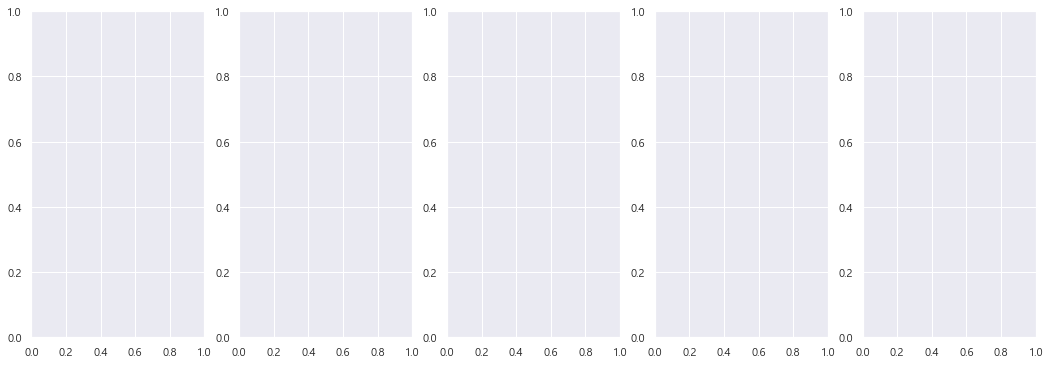

In [110]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
ridge_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(ridge_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [ ]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246184,0.246183,0.246184,0.246178,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002640,-0.002640,-0.002640,-0.002639,-0.002638
주택종합 매매가격지수,-0.052596,-0.052597,-0.052596,-0.052605,-0.052685
소비자물가지수,-0.060319,-0.060316,-0.060318,-0.060296,-0.060096
예금은행 대출금리,-0.930051,-0.930040,-0.930049,-0.929945,-0.929001


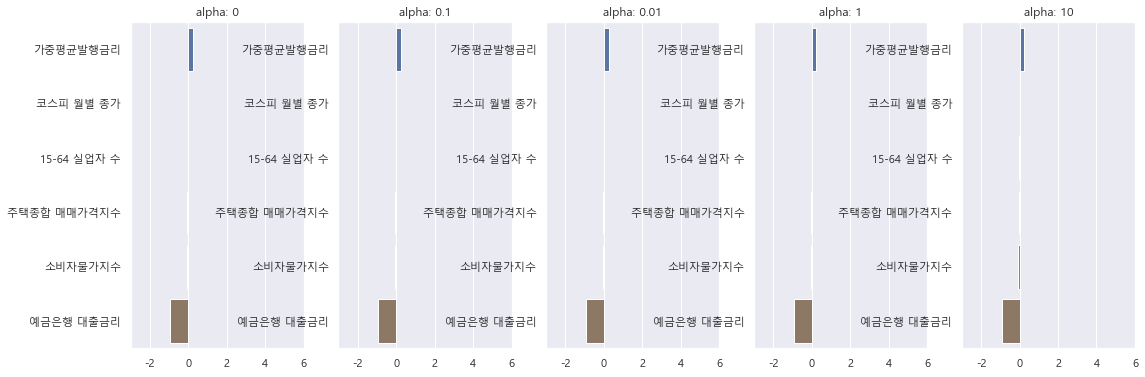

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246124    0.246124     0.246124  0.246124   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002638   -0.002638    -0.002638 -0.002638  -0.002638
주택종합 매매가격지수 -0.052685   -0.052685    -0.052685 -0.052685  -0.052685
소비자물가지수     -0.060096   -0.060096    -0.060096 -0.060096  -0.060096
예금은행 대출금리   -0.929001   -0.929001    -0.929001 -0.929001  -0.929001


In [ ]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
lasso_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(lasso_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [ ]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246124,0.246124,0.246124,0.246124,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002638,-0.002638,-0.002638,-0.002638,-0.002638
주택종합 매매가격지수,-0.052685,-0.052685,-0.052685,-0.052685,-0.052685
소비자물가지수,-0.060096,-0.060096,-0.060096,-0.060096,-0.060096
예금은행 대출금리,-0.929001,-0.929001,-0.929001,-0.929001,-0.929001


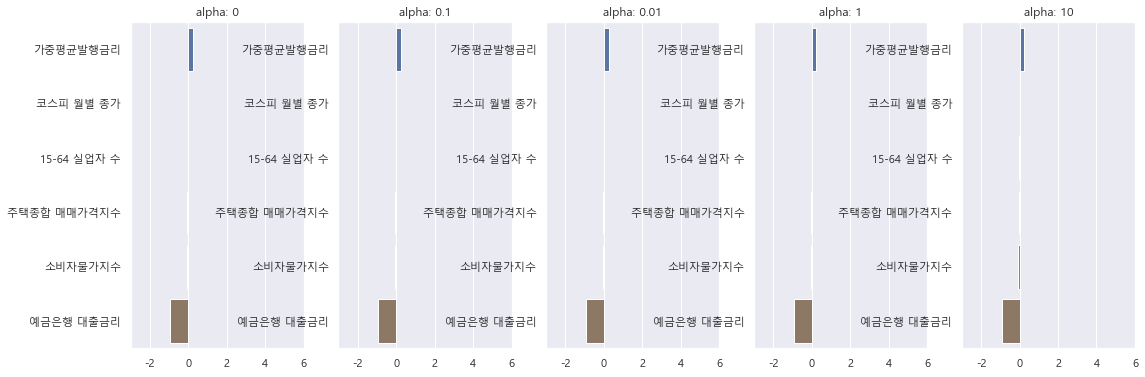

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246124    0.246124     0.246124  0.246124   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002638   -0.002638    -0.002638 -0.002638  -0.002638
주택종합 매매가격지수 -0.052685   -0.052685    -0.052685 -0.052685  -0.052685
소비자물가지수     -0.060096   -0.060096    -0.060096 -0.060096  -0.060096
예금은행 대출금리   -0.929001   -0.929001    -0.929001 -0.929001  -0.929001


In [ ]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha = alpha)
    elastic.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
elastic_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(elastic_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [ ]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246124,0.246124,0.246124,0.246124,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002638,-0.002638,-0.002638,-0.002638,-0.002638
주택종합 매매가격지수,-0.052685,-0.052685,-0.052685,-0.052685,-0.052685
소비자물가지수,-0.060096,-0.060096,-0.060096,-0.060096,-0.060096
예금은행 대출금리,-0.929001,-0.929001,-0.929001,-0.929001,-0.929001
